In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
data = pd.read_csv('E:\Pandas\Diabetes Prediction Project\Dataset\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [58]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

In [60]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
#No Duplicates
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


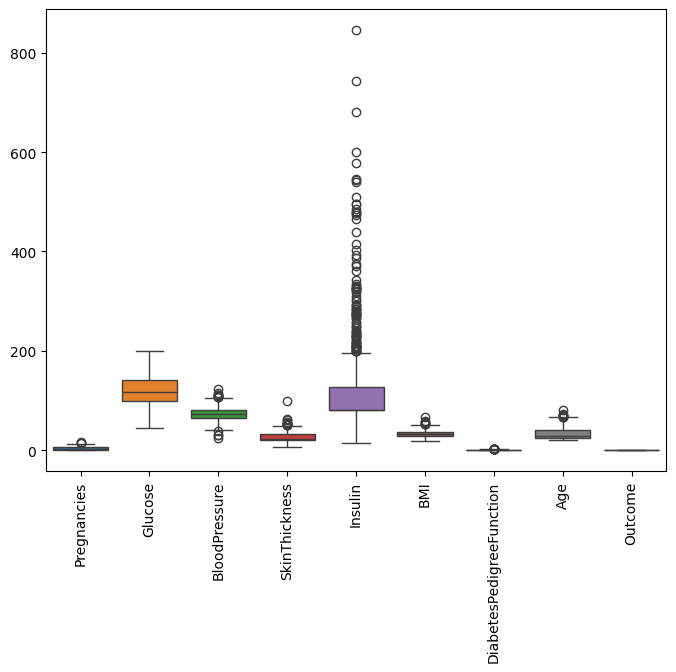

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [63]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [64]:
#Divided depenent and independent feature
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [66]:
x_train.shape,x_test.shape

((614, 8), (154, 8))

In [67]:
y_train.shape,y_test.shape

((614,), (154,))

In [68]:
import pickle

In [69]:
def scaler_standardScaler(x_train,x_test):
    scaler = StandardScaler()

    x_train_scaler = scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    file = open('E:\Pandas\Diabetes Prediction Project\Model\standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return x_train_scaler,x_test_scaler

In [70]:
x_train_scale,x_test_scale = scaler_standardScaler(x_train,x_test)

In [71]:
x_train_scale

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [72]:
x_test_scale

array([[ 0.68185612, -0.79260029, -1.16621189, ...,  0.23836693,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.32713796,  0.23821566, ...,  0.48367817,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.4601272 , -0.67053158, ..., -0.2233954 ,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.89234222, -0.00962449, ...,  0.64240897,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.80327055, -0.17485126, ..., -0.62743744,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.59053571, -0.17485126, ...,  0.42595788,
         0.70068816,  0.53008521]])

In [73]:
classifier = LogisticRegression()

In [74]:
classifier.fit(x_train_scale,y_train)

LogisticRegression()

In [75]:
classifier = LogisticRegression()
parameters = {'penalty':('l1','l2','elasticnet',None),'C':[0,1,2,3,4,5,6,7,8],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}
clf = GridSearchCV(classifier,param_grid=parameters,cv=5)

In [76]:
clf.fit(x_train_scale,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [77]:
clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [78]:
classifier = LogisticRegression(C=1,penalty='l2',solver='lbfgs')

In [79]:
classifier.fit(x_train_scale,y_train)

LogisticRegression(C=1)

In [80]:
classifier.intercept_

array([-0.87387862])

In [81]:
classifier.coef_

array([[ 0.22192395,  1.12487346, -0.16824905,  0.01648627, -0.18588227,
         0.7313578 ,  0.21171528,  0.39300256]])

In [82]:
y_pred = classifier.predict(x_test_scale)

In [84]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [86]:
list(y_test)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [87]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[83 16]
 [20 35]]
0.7662337662337663
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [88]:
conf_mat = confusion_matrix(y_test,y_pred)

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [91]:
accuraccy = (true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)

In [99]:
accuraccy

0.7662337662337663

In [100]:
precision = true_positive/(true_positive+false_positive)

In [101]:
precision

0.8383838383838383

In [102]:
file = open('E:\Pandas\Diabetes Prediction Project\Model\classifier.pkl','wb')
pickle.dump(classifier,file)
file.close()
